# Numpy and Matplotlib

* Numpy = Numerical Python
* Matplotlib = Mathematical Plotting Library

In [41]:
import numpy

In [42]:
my_list = [0,1,2,3]
print(my_list)

[0, 1, 2, 3]


In [43]:
my_array = numpy.array([0,1,2,3])
print(my_array)

[0 1 2 3]


In [44]:
my_array_2d = numpy.array([[0,1,2,3], 
                           [4,5,6,7]])
print(my_array_2d)

[[0 1 2 3]
 [4 5 6 7]]


In [45]:
print(my_array.shape)
print(my_array_2d.shape)

(4,)
(2, 4)


### Import Nino 3.4 SST data

* This is a tab-separated csv file
* Here, we will use ```numpy.loadtxt()``` to open it
* Data are organized with 10 columns:  
```YR   MON  NINO1+2  ANOM   NINO3    ANOM   NINO4    ANOM   NINO3.4  ANOM```

In [46]:
nino_index_data = numpy.loadtxt('../data/ersst4.nino.mth.81-10.ascii.txt', skiprows=1)

In [47]:
# first two columns are year and month
years = nino_index_data[:,0]
months = nino_index_data[:,1]

In [48]:
# ninth column is the Nino 3.4 index
nino34_data = nino_index_data[:,8]

In [49]:
print(nino34_data.shape)
print(nino34_data[:20])

(795,)
[24.91 25.26 26.08 26.38 26.25 26.59 26.4  25.9  25.73 25.86 25.71 25.43
 25.4  25.78 27.02 27.63 27.99 27.51 27.58 27.07]


### Print some statistics of the Nino 3.4 time series

In [60]:
print(numpy.mean(nino34_data))

27.012163522012575


In [61]:
print(numpy.std(nino34_data))

0.9263663230361517


### Plot the Nino 3.4 time data

In [65]:
# import the plotting library
import matplotlib.pyplot

Text(0, 0.5, 'counts')

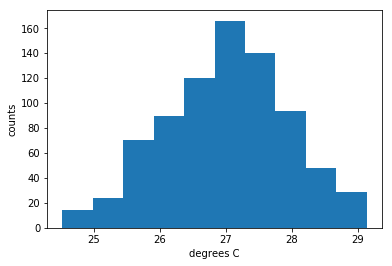

In [72]:
matplotlib.pyplot.hist(nino34_data)

matplotlib.pyplot.xlabel('degrees C')
matplotlib.pyplot.ylabel('counts')

Text(0.5, 1.0, 'Nino 3.4 index')

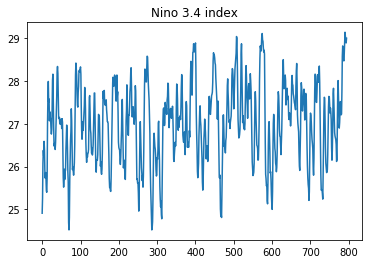

In [74]:
matplotlib.pyplot.plot(nino34_data)

matplotlib.pyplot.title('Nino 3.4 index')

In [75]:
print(years[:14])
print(months[:14])

[1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950.
 1951. 1951.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  2.]


Convert series of months and days into a ```datetime``` array.  
Matplotlib is smart about handling these data types.

In [76]:
import datetime

In [80]:
nino34_dates = [] # create empty list
for i in range(len(years)):
    # loop through each entry in years and months and create a date from them
    nino34_dates.append(datetime.date(year=int(years[i]), month=int(months[i]), day=15))

In [81]:
nino34_dates[:14]

[datetime.date(1950, 1, 15),
 datetime.date(1950, 2, 15),
 datetime.date(1950, 3, 15),
 datetime.date(1950, 4, 15),
 datetime.date(1950, 5, 15),
 datetime.date(1950, 6, 15),
 datetime.date(1950, 7, 15),
 datetime.date(1950, 8, 15),
 datetime.date(1950, 9, 15),
 datetime.date(1950, 10, 15),
 datetime.date(1950, 11, 15),
 datetime.date(1950, 12, 15),
 datetime.date(1951, 1, 15),
 datetime.date(1951, 2, 15)]

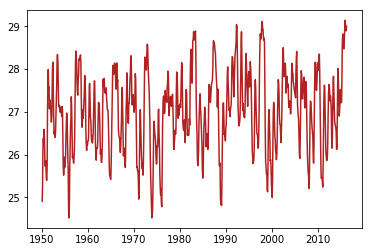

In [83]:
matplotlib.pyplot.plot(nino34_dates, nino34_data, c='firebrick')

## Note on importing libraries

* Import a library with as a shorter name.  Typical examples:
  * ```import numpy as np```
  * ```import matplotlib.pyplot as plt```

In [84]:
import numpy as np
import matplotlib.pyplot as plt

### Make a slightly nicer figure

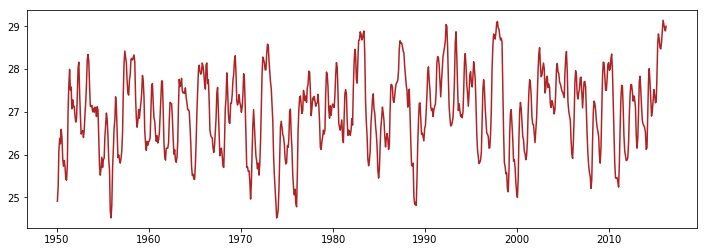

In [89]:
# create a "figure object"
fig = plt.figure(figsize=(12,4)) # 12 inches wide, 4 inches tall

# add an axes object to the figure
ax = fig.add_subplot(1,1,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(nino34_dates, nino34_data, c='firebrick')

### Plot the centered Nino3.4 data and plus/minus one standard deviation as horizontal lines

In [91]:
nino34_data_centered = nino34_data - np.mean(nino34_data)
nino34_data_std = np.std(nino34_data)

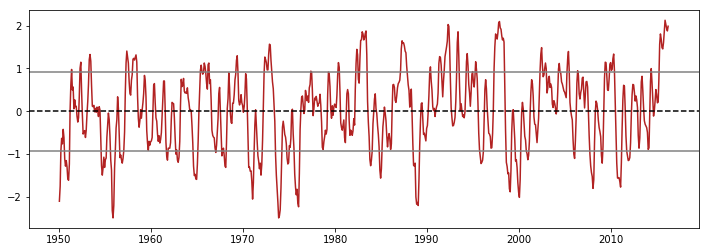

In [98]:
# create a "figure object"
fig = plt.figure(figsize=(12,4)) # 12 inches wide, 4 inches tall

# add an axes object to the figure
ax = fig.add_subplot(1,1,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(nino34_dates, nino34_data_centered, c='firebrick')

# add horizontal lines at 0 and ±1 stdev
ax.axhline(0, ls='--', c='black')
ax.axhline(nino34_data_std, c='gray')
ax.axhline(-nino34_data_std, c='gray')

fig.savefig('nino34_centered_time_series.pdf')

# Key points

* Import libraries like ```numpy```, ```matplotlib.pyplot```, and ```datetime``` for better data manipulation
* Typical imports you'll see in the Python community are:
  * ```import numpy as np```
  * ```import matplotlib.pyplot as plt```
* Create a quick figure using syntax like ```plt.plot()``` or ```plt.scatter()```
* Create a better figure in 3 steps:
  1. Create a figure object: ```fig = plt.figure()```
  2. Add axes to that figure: ```ax = fig.add_subplot(1,1,1)```
  3. Use that ```ax``` object in the same way you would a plot:  ```ax.plot()```, ```ax.hist()```